# Heat Flow

Project of Modern Numerical Methods

## Libraries

Run it first!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Simulation started, the data will be ready when the count reach 100%
150 100 28802
0.27749999999999997
001 %


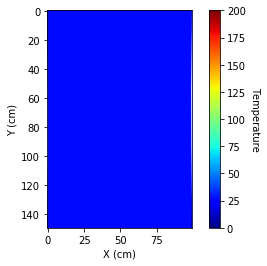

120


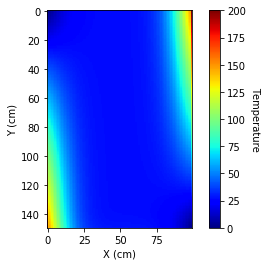

240


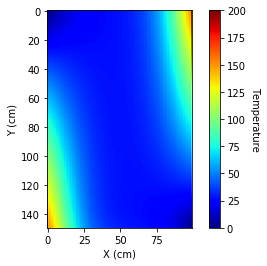

360


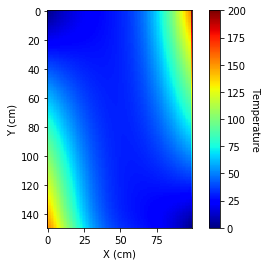

480


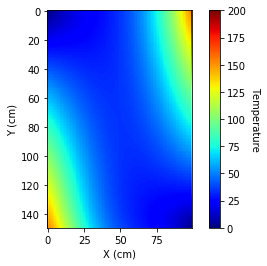

600


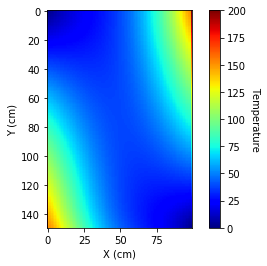

720


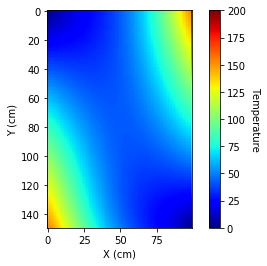

840


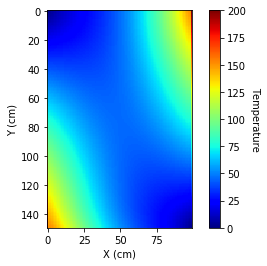

960


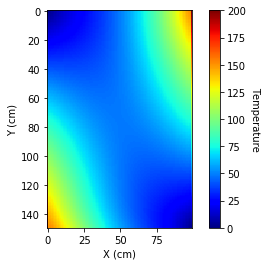

1080


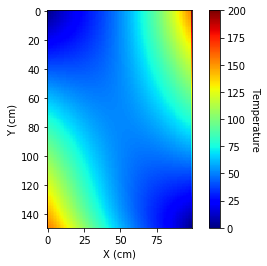

1200


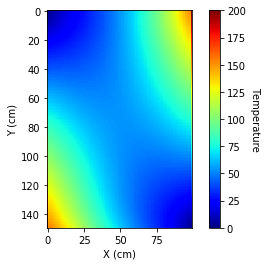

1320


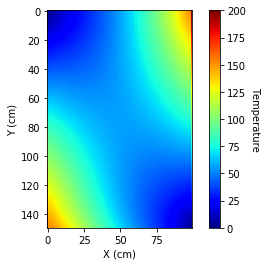

1440


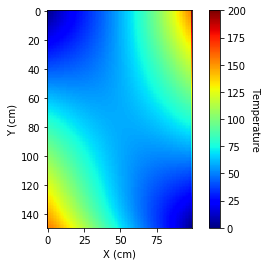

1560


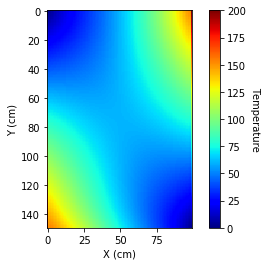

1680


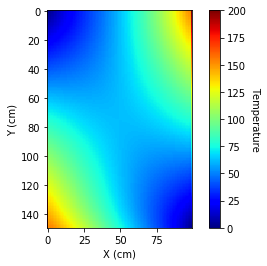

1800


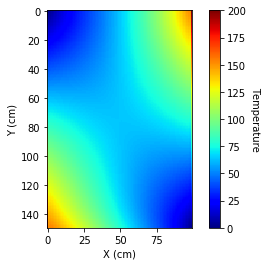

1920


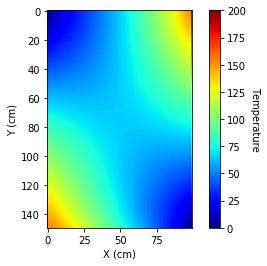

2040


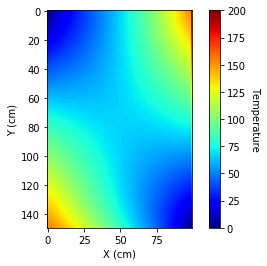

2160


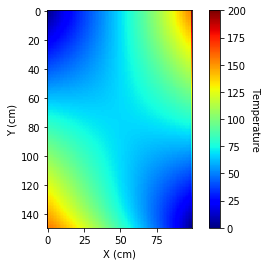

2280


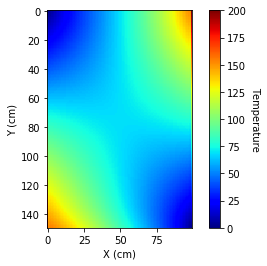

2400


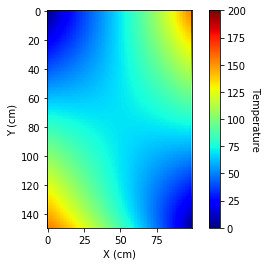

2520


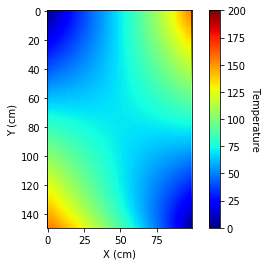

2640


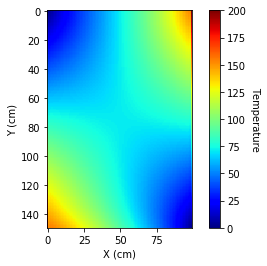

2760


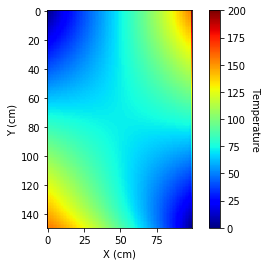

2880


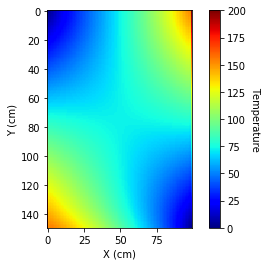

3000


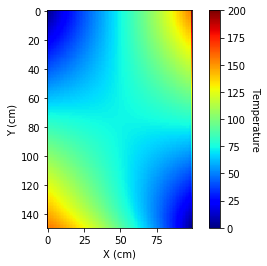

3120


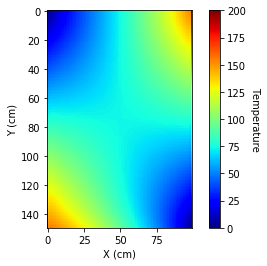

3240


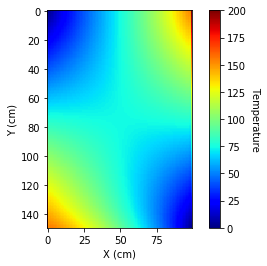

3360


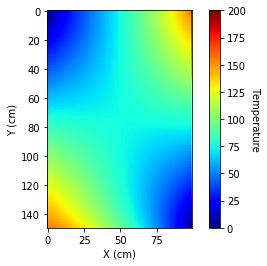

3480


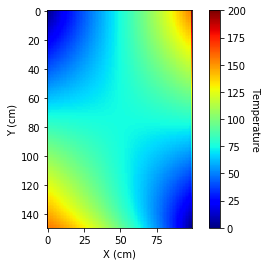

3600


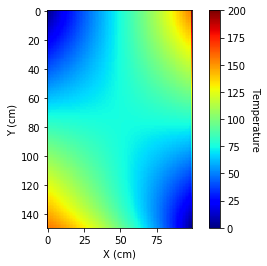

3720


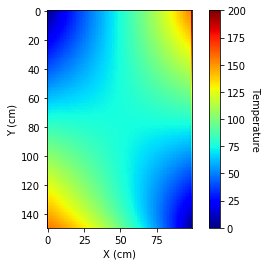

3840


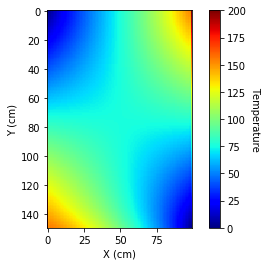

3960


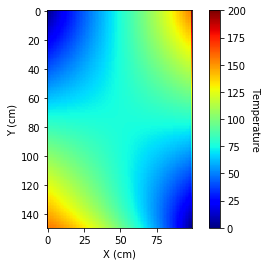

4080


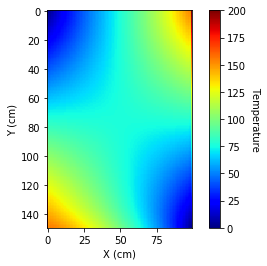

4200


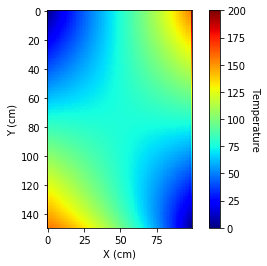

4320


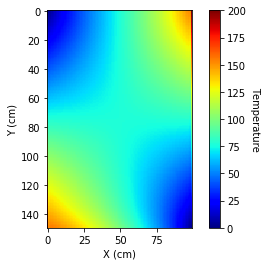

4440


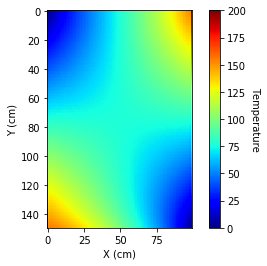

4560


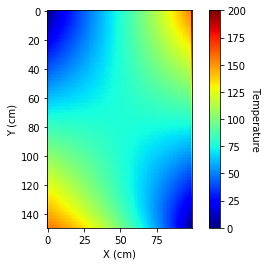

4680


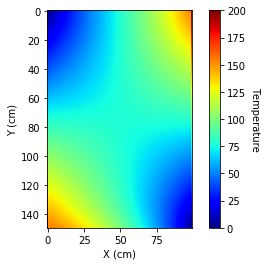

4800


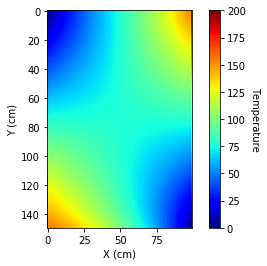

4920


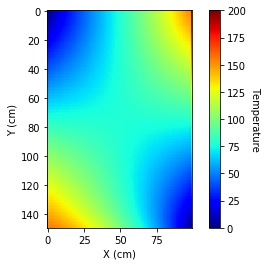

5040


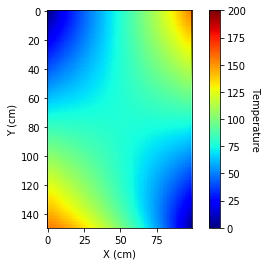

5160


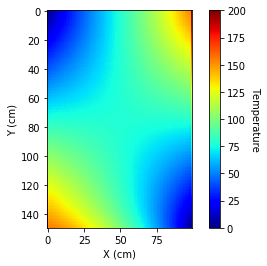

5280


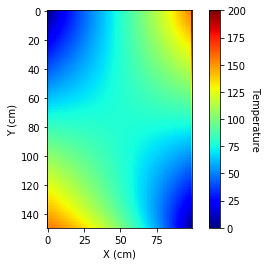

5400


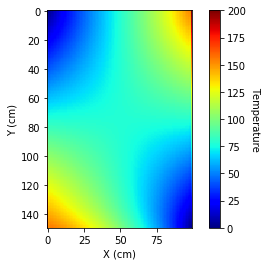

5520


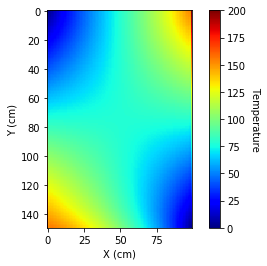

5640


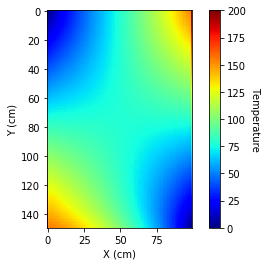

5760


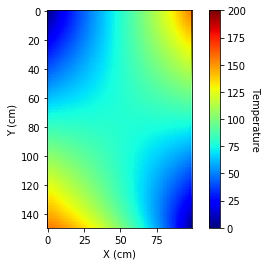

5880


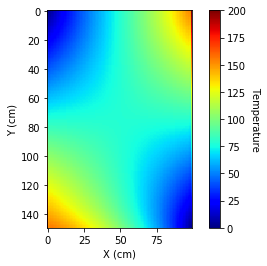

6000


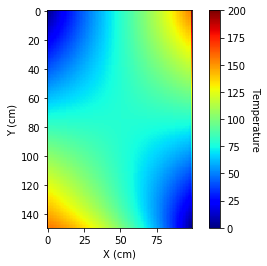

6120


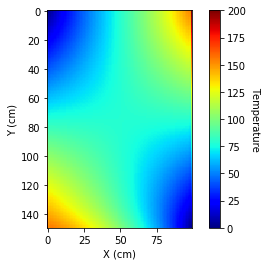

6240


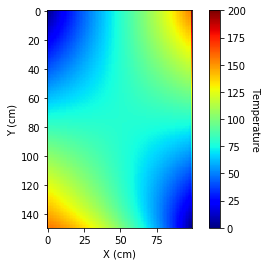

6360


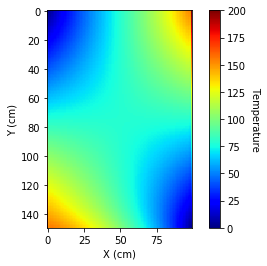

6480


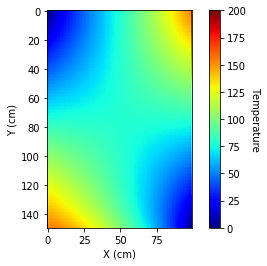

6600


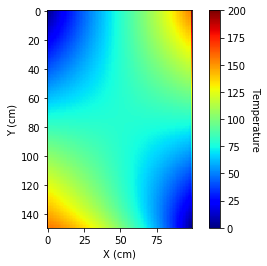

6720


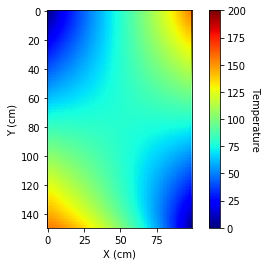

6840


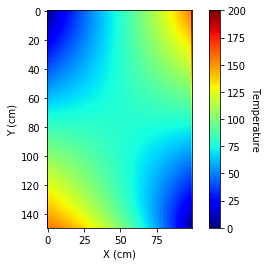

6960


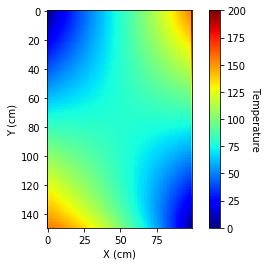

7080


7200


7320


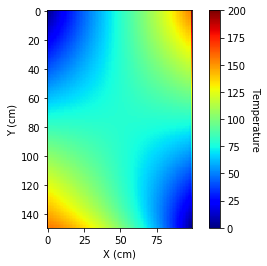

7440


7560


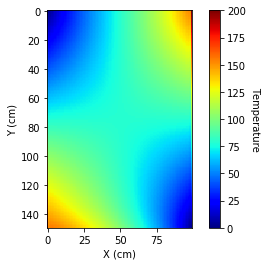

7680


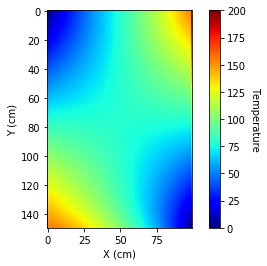

7800


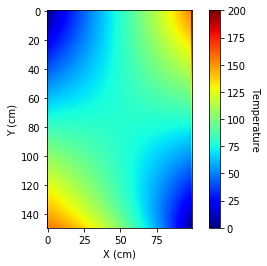

7920


8040


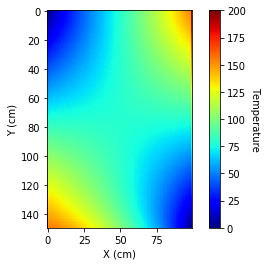

8160


8280


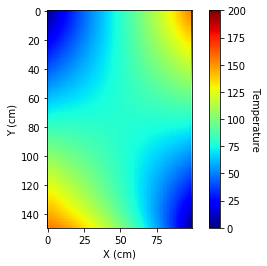

8400


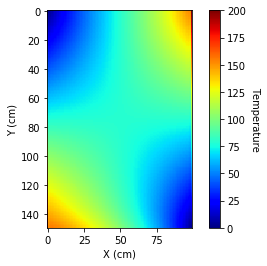

8520


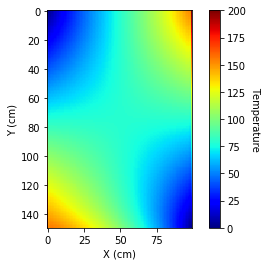

8640


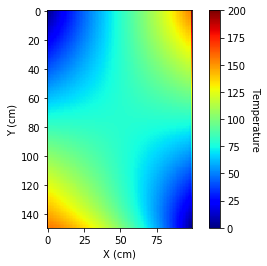

8760


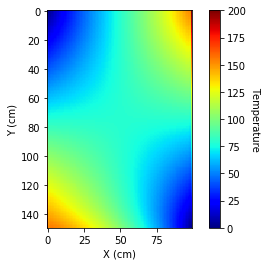

8880


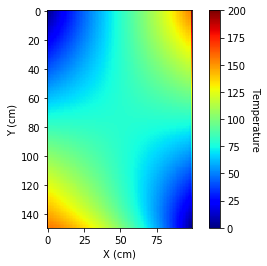

9000


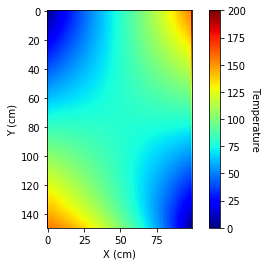

9120


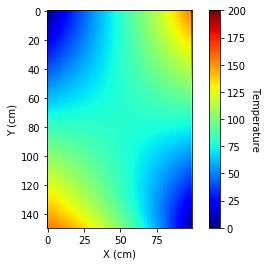

9240


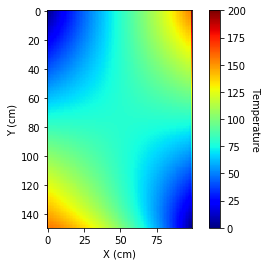

9360


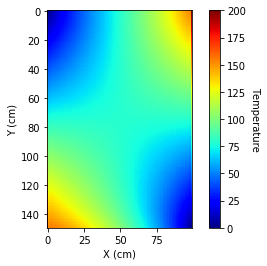

9480


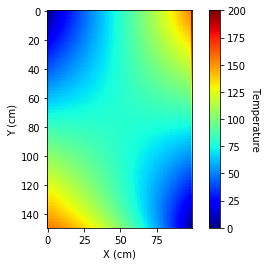

9600


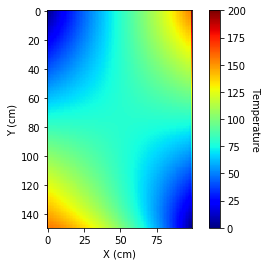

9720


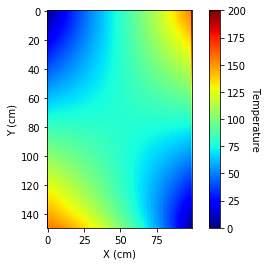

9840


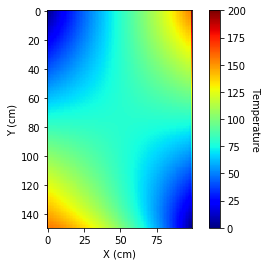

9960


10080


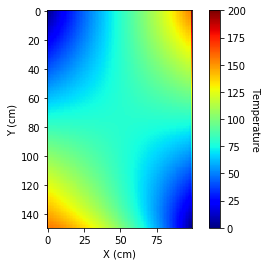

10200


10320


10440


10560


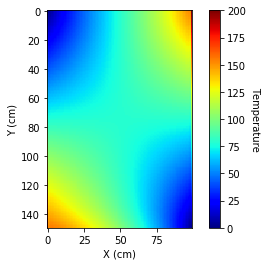

10680


10800


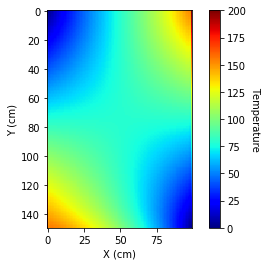

10920


11040


11160


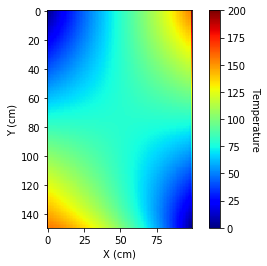

11280


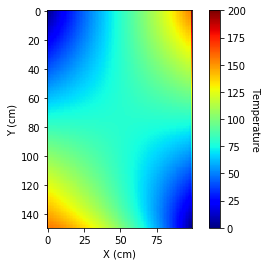

11400


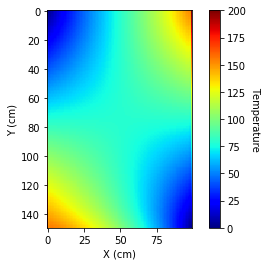

11520


11640


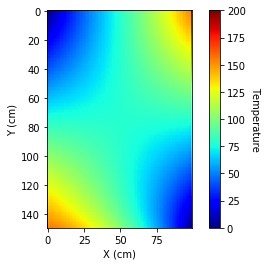

11760


11880


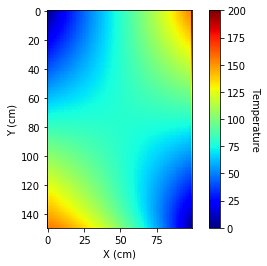

12000


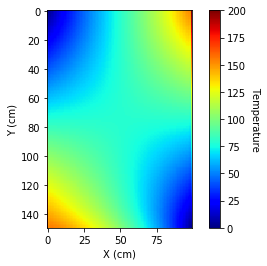

12120


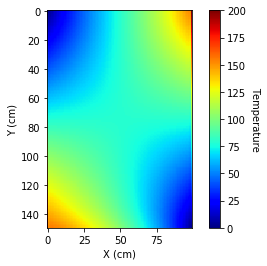

12240


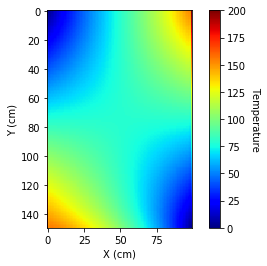

12360


12480


12600


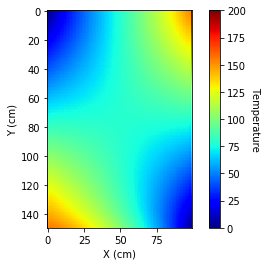

12720


12840


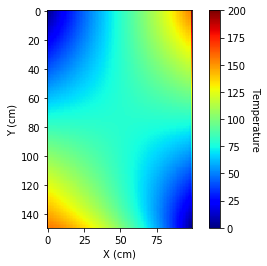

12960


13080


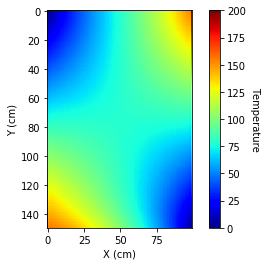

13200


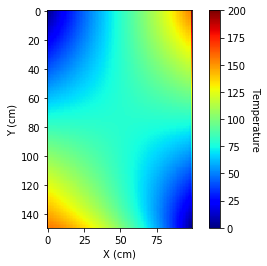

13320


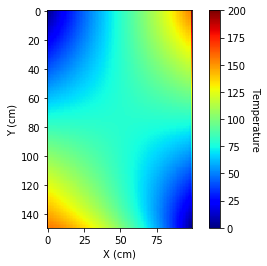

13440


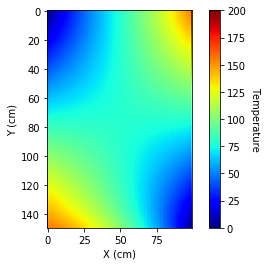

13560


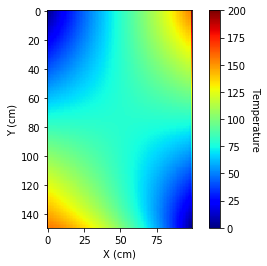

13680


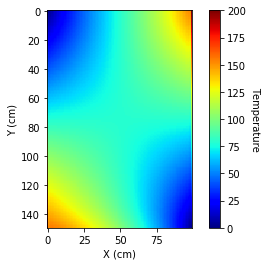

13800


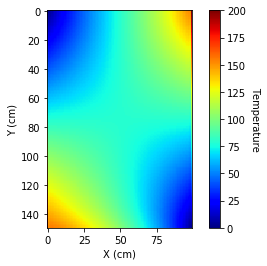

13920


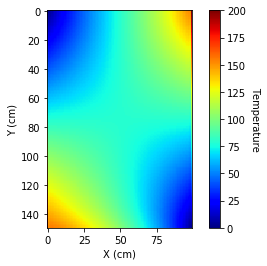

14040


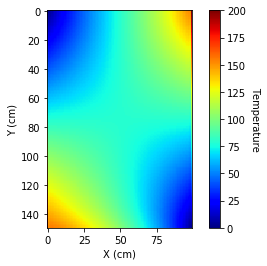

14160


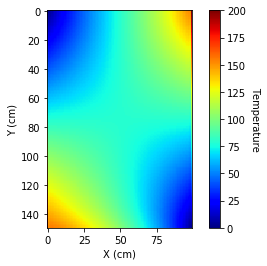

14280


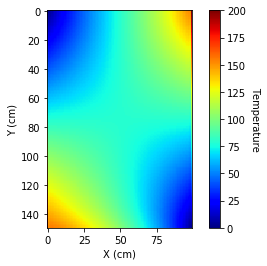

14400


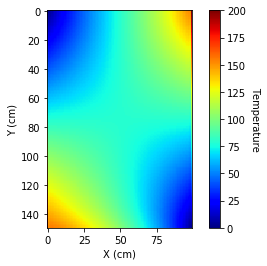

In [8]:
def Tridiag_CNM(a, b, c, d):
    """
    Solves a matrix multiplication using symmetries of a triagonal matrix.

    Solves M X = D, 
    where M is a suqare tridiagonal matrix, D and X are column matrices, and D are known value.
    it is necessary to provide the elements for M matrix in three different arrays, the upper, main and lower diagonals.
    The D is also an array that need to be inserted, then the result is given in another array.
    
    Parameters
    ----------
    a : nparray
        Lower diagonal.   
    b : nparray
        Main diagonal.
    c : nparray
        Upper diagonal. 
    d : nparray
        Past result. 
    
    Returns
    -------
        nparray
        Next result.
    """
    size = a.size
    h = np.zeros(size)
    p = np.zeros(size)
    x = np.zeros(size)
    
    h[0] = c[0]/b[0]
    p[0]= d[0]/b[0]

    for i in range(1, size):
        h[i] = c[i]/(b[i] - a[i]*h[i-1])
        p[i] = (d[i] - a[i]*p[i-1])/(b[i] - a[i]*h[i-1])
        
    x[size-1] = p[size-1]
    
    for i in range(size-2, -1, -1):
        x[i] = p[i] - h[i]*x[i+1]
        
    return x


def initial_condition(Temp, temp_initial, n_x, n_y):
    """
    Sets the initial condition of the system.

    Sets the same initial temperature for the whole system, the value is chosen as a parameter.

    Parameters
    ----------
    Temp : nparray
        Matrix the stores the values of the temperatures of the system in each time step.
    temp_initial : float
        The initial temperature of the system.
    n_x : int
        Number of steps in the x direction.
    n_y : int
        Number of steps in the y direction.
    """
    for i in range(0, n_x):
        for j in range(0, n_y):
            Temp[0][i][j] = temp_initial
                   
        
def boundary_condition(Temp, t, n_x, n_y, temp_low, temp_high):
    """
    Short explanation.

    Explanation.

    Parameters
    ----------
    Temp : nparray
        Explanation.
    t : int
        Explanation.
    n_y : int
        Explanation.
    temp_low: float
        Explanation.
    temp_high : float
        Explanation.
    """
    # left
    delta_temp = temp_high - temp_low
    step_temp = delta_temp/n_x
    temp = temp_low
    for i in range(0, n_x):
        Temp[t][i][0] = temp
        temp += step_temp
        
    #right
    temp=temp_high
    for i in range(0, n_x):
        Temp[t][i][n_y - 1] = temp
        temp -= step_temp


def simulate(total_time, x, y, delta_time, delta_space, h, temp_initial, temp_low, temp_high):
    """
    Short explanation.

    Explanation.

    Parameters
    ----------
    n_t : int
        Explanation.
        Bigger than 10, becuase of the percentage.
    n_y : int
        Explanation.
        Preferably a multiple of 6, symetry of the system.
    h : float
        Explanation.

    Returns
    -------
        nparray
        Explanation.
    """
    print("Simulation started, the data will be ready when the count reach 100%")
    n_y = int(x/delta_space)
    n_x = int(y/delta_space)
    n_t = int(total_time/delta_time)
    print(n_x, n_y, n_t)
    # Copper 1.11 × 10−4
    eta = (1.11E-4*delta_time)/(2*delta_space*delta_space)
    print(eta)
    Temp = np.zeros((n_t+1, n_x, n_y)) # +1 for the initial condition
    Temp_star = np.zeros((n_x, n_y))
    initial_condition(Temp, temp_initial, n_x, n_y)
    boundary_condition(Temp, 0, n_x, n_y, temp_low, temp_high)
    
    a1 = np.zeros(n_y)
    a2 = np.zeros(n_y)
    b1 = np.zeros(n_y)
    b2 = np.zeros(n_y)
    c1 = np.zeros(n_y)
    c2 = np.zeros(n_y)
    d1 = np.zeros(n_y)
    d2 = np.zeros(n_y)
    
    count = 1
    partial = n_t//100
    
    for t in range(0, n_t-1):
        for i in range(0, n_x-1):
            # To correct the problem with the range j-1
            a1[0] = -1.0*eta
            b1[0] = 1 + 2.0*eta
            c1[0] = -1.0*eta
            d1[0] = eta*Temp[t][i][1] + (1 - 2.0*eta)*Temp[t][i][0] + eta*Temp[t][i][0]
            for j in range(1, n_y-1):
                a1[j] = -1.0*eta
                b1[j] = 1 + 2.0*eta
                c1[j] = -1.0*eta
                d1[j] = eta*Temp[t][i][j+1] + (1 - 2.0*eta)*Temp[t][i][j] + eta*Temp[t][i][j-1]
            # To correct the problem with the range j+1
            a1[n_y-1] = -1.0*eta
            b1[n_y-1] = 1 + 2.0*eta
            c1[n_y-1] = -1.0*eta
            d1[n_y-1] = eta*Temp[t][i][-1] + (1 - 2.0*eta)*Temp[t][i][n_y-1] + eta*Temp[t][i][n_y-2]
        
            x1 = Tridiag_CNM(a1, b1, c1, d1)
            
            Temp_star[i] = x1
        
        i=n_x-1 # for the flux
        # To correct the problem with the range j-1
        a1[0] = -1.0*eta
        b1[0] = 1 + 2.0*eta - h
        c1[0] = -1.0*eta
        d1[0] = eta*Temp[t][i][1] + (1 - 2.0*eta + h)*Temp[t][i][0] + eta*Temp[t][i][0]
        for j in range(1, n_y-1):
            a1[j] = -1.0*eta
            b1[j] = 1 + 2.0*eta - h
            c1[j] = -1.0*eta
            d1[j] = eta*Temp[t][i][j+1] + (1 - 2.0*eta + h)*Temp[t][i][j] + eta*Temp[t][i][j-1]
        # To correct the problem with the range j+1
        a1[n_y-1] = -1.0*eta
        b1[n_y-1] = 1 + 2.0*eta - h
        c1[n_y-1] = -1.0*eta
        d1[n_y-1] = eta*Temp[t][i][-1] + (1 - 2.0*eta + h)*Temp[t][i][n_y-1] + eta*Temp[t][i][n_y-2]
        
        x1 = Tridiag_CNM(a1, b1, c1, d1)
            
        Temp_star[i] = x1
        
        # The first one, it need to be separated, becuase of the range i-1
        i = 0 
        for j in range(0, n_y):
            a2[j] = -1.0*eta
            b2[j] = 1 + 2.0*eta
            c2[j] = -1.0*eta
            d2[j] = eta*Temp_star[i+1][j] + (1 - 2.0*eta)*Temp_star[i][j] + eta*Temp_star[i][j]
        
        x2 = Tridiag_CNM(a2, b2, c2, d2)
        Temp[t+1][i] = x2
            
        for i in range(1, n_x-1):
            for j in range(0, n_y):
                a2[j] = -1.0*eta
                b2[j] = 1 + 2.0*eta
                c2[j] = -1.0*eta
                d2[j] = eta*Temp_star[i+1][j] + (1 - 2.0*eta)*Temp_star[i][j] + eta*Temp_star[i-1][j]
        
            x2 = Tridiag_CNM(a2, b2, c2, d2)
            
            Temp[t+1][i] = x2
        
        # The last one, it need to be separated, becuase of the range i+1
        i = n_x-1 
        for j in range(0, n_y):
            a2[j] = -1.0*eta
            b2[j] = 1 + 2.0*eta - h
            c2[j] = -1.0*eta
            d2[j] = eta*Temp_star[i][j] + (1 - 2.0*eta + h)*Temp_star[i][j] + eta*Temp_star[i-1][j]
            
        x2 = Tridiag_CNM(a2, b2, c2, d2)
        Temp[t+1][i] = x2
        
        boundary_condition(Temp, t, n_x, n_y, temp_low, temp_high)
        boundary_condition(Temp, t+1, n_x, n_y, temp_low, temp_high)
        
        if t%partial == 0:
            print(count, "%", end="\r")
            count += 1 
            
    return Temp


def plot_specific_time(t, Temp):
    """
    Short explanation.

    Explanation.

    Parameters
    ----------
    t : int
        Explanation.
    Temp : nparray
        Explanation.
    """
    data = Temp[t]
    
    fig, ax = plt.subplots()
    im = ax.imshow(data, cmap='jet')
    ax.set_xlabel('X (cm)')
    ax.set_ylabel('Y (cm)')
    
    cbar = ax.figure.colorbar(im)
    cbar.ax.set_ylabel('Temperature', rotation=-90, va="bottom")
    plt.show()
    
    

# simulate(total_time, x, y, delta_time, delta_space, h, temp_initial, temp_low, temp_high):
data = simulate(14401, 1, 1.5, 0.5, 0.01, 8.0E-4 , 27., 0., 200.)
for i in range(0, 14401, 120):
    print(i)
    plot_specific_time(i, data)
